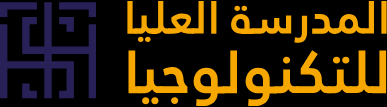
### Higher School of Technology

# 📊 Data Types in Data Science for Financial Analysis
**Prerequisites**

[Python basics](Day0.ipynb)

Financial datasets are commonly stored in formats such as .csv, .xlsx, .json, or even in image directories (e.g., scanned checks or handwritten forms). Regardless of the format, the first crucial step is always to import and validate the dataset — ensuring it is loaded correctly, complete, and properly structured for analysis.

This notebook introduces the three most common data types used in financial data analysis:
- Tabular data
- Time series data
- Image data

# 📊 Tabular Financial Data Analysis
Tabular data is structured as a two-dimensional table (rows and columns) containing numerical or categorical (text) values. Each row represents an observation, and each column represents a variable or attribute.

Hence, we start our processing with a complete workflow for analyzing tabular financial datasets using example dataset: `loan_approval_dataset.csv`

## 🧠 Objective:
- Step 1 – Load and Preprocess the Tabular Financial Dataset,
- Step 2 – View and access the dataset structure: rows, columns,
- Step 3 – Get info about missing values,
- Step 4 – Perform Exploratory Data Analysis (EDA),
- Step 5 – Correlation Between Numerical Variables.

## 🧮 Step 1 – Load and Preprocess the Tabular Financial Dataset
### 🏦 About Dataset
The loan_approval_dataset.csv dataset comprises historical records of loan applications collected from a financial institution. It contains demographic, financial, and asset-related information of applicants, along with the final loan approval decision. The dataset is intended for building and evaluating predictive models in credit scoring, loan risk assessment, and financial decision automation.

The dataset includes 4,269 rows, each representing a unique loan application.

📌 Attributes:
- loan_id: Unique identifier assigned to each loan application.
- no_of_dependents: Number of dependents supported by the applicant.
- education: Education level of the applicant (Graduate/Not Graduate).
- self_employed: Indicates if the applicant is self-employed (Yes/No).
- income_annum: Annual income of the applicant (numeric).
- loan_amount: Requested loan amount in local currency.
- loan_term: Duration of the loan repayment in months.
- cibil_score: Applicant’s credit score from CIBIL, ranging typically between 300 and 900.
- residential_assets_value: Value of residential property owned by the applicant.
- commercial_assets_value: Value of commercial property owned.
- luxury_assets_value: Estimated value of luxury items (cars, jewelry, etc.).
- bank_asset_value: Total assets in the applicant’s bank accounts.
- loan_status: Target variable indicating whether the loan was approved (Yes) or rejected (No).

In [6]:
# import necessary libraries
import pandas as pd
import numpy as np

# load dataset
df = pd.read_csv('datasets/loan_approval_dataset.csv')

## 🧮 Step 2 – View and access the dataset structure: rows, columns
Viewing and accessing the financial dataset structure (rows and columns) is essential to understand its dimensions, data types, and layout, which helps guide proper preprocessing, analysis, and model selection.

In [7]:
# view the dataset structure by preview the first 5 rows
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
# access to data by index row 5 column 4
print(df.iloc[5,4])

# access to data in entire row 5
print(df.iloc[5,:])

# access to data in entire column 4
print(df.iloc[:,4])

# filter categorical data by column name
df[df['self_employed'] == ' No']

# filter numeric data by column name
df[df['loan_term'] <= 2]

## 🧮 Step 3 – Get info about missing values
Cleaning missing values in financial data is essential to ensure accurate analysis, reliable modeling, and consistent performance metrics, as even small gaps can distort data continuity and mislead algorithms.

In [ ]:
# get info on column types and missing values
df.info()

In [ ]:
# introduce missing value in column income_annum row five
income_annum = df.iloc[5,4]
df.iloc[5,4] = np.nan;
df.info()

# find the rows with nan
nan_rows = df[df['income_annum'].isnull()]
print(nan_rows)

# restore the original value
df.iloc[5,4] = income_annum

## 🧮 Step 4 – Perform Exploratory Data Analysis (EDA)
EDA is used to visually inspect the data to spot trends, anomalies, distributions, and relationships—critical in finance to detect risk factors or fraud patterns.
### 4.1 Distribution of key Numerical Variables
Analyzing the distribution of key numerical variables (like loan amount, income annum) helps understand the range, central tendency, spread, and shape of your financial data — which is critical for detecting outliers or fraud patterns.

In [ ]:
# import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['loan_amount'])
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.show()

sns.histplot(df['income_annum'])
plt.title('Applicant Income Distribution')
plt.xlabel('Income')
plt.show()

### 4.2 Categorical Variable Distribution
Understand the balance of approvals vs rejections, or the distribution of customer education level and self employement.

In [ ]:
# Count of approved vs rejected loans
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Counts')
plt.show()

# Count of approved vs rejected loans
sns.countplot(x='education', data=df)
plt.title('Education Status Counts')
plt.show()

# Count of approved vs rejected loans
sns.countplot(x='self_employed', data=df)
plt.title('Employement Status Counts')
plt.show()

### 4.3 Outlier Detection
Outliers in income or loan requests may indicate fraud, VIP clients, or data entry errors.

In [ ]:
# outliers in applicant income
sns.boxplot(x=df['income_annum'])
plt.title('Applicant Income Annum Boxplot')
plt.show()

# outliers in loan amount
sns.boxplot(x=df['loan_amount'])
plt.title('Applicant Loan Amount Boxplot')
plt.show()

In [ ]:
# insert outlayer
income_annum = df.iloc[5,4]
df.iloc[5,4] = income_annum * 5

# outliers in applicant income
sns.boxplot(x=df['income_annum'])
plt.title('Applicant Income Annum Boxplot with oultlayer')
plt.show()

# restore the original value
df.iloc[5,4] = income_annum

### 4.4 Grouped Aggregates
Compare group-wise statistics (e.g., average loan amount by gender or approval status).

In [ ]:
# average loan amount by loan status
group_stats = df.groupby('loan_status')['loan_amount'].mean()
print('loan amount by status:\n', group_stats)

# average loan amount by loan status
group_stats = df.groupby('education')['loan_amount'].mean()
print('loan amount by status:\n', group_stats)

# count of loan status by education
group_stats = df.groupby('education')['loan_status'].count()
print('loan status by education:\n', group_stats)

## 🧮 Step 5 – Correlation Between Numerical Variables
Check for linear relationships between numerical variables, e.g., between income and loan amount, or loan approval status.
In this dataset, the loan_status column is categorical ("Approved" or "Rejected"), and correlation can only be computed between numeric columns. So first, we need to convert loan_status into numeric values.

In [ ]:
# Encode loan_status: Approved = 1, Rejected = 0
#df['loan_status_numeric'] = df['loan_status'].map({' Approved':1,' Rejected':0})
#df['self_employed_numeric'] = df['self_employed'].map({' Yes':1,' No':0})
#df['education_numeric'] = df['education'].map({' Graduate':1,' Not Graduate':0})

# Compute correlation between all numerical variables
corr = df.corr(numeric_only=True)
#sns.heatmap(corr)
#sns.heatmap(round(corr,2))
#sns.heatmap(round(corr,2),annot=True)
sns.heatmap(round(corr,2),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 📈 Time series Financial Data Analysis

This type of data is similar to standard tabular data—organized as a two-dimensional table containing numerical or categorical (text) values. However, what makes time series data unique is that the first column contains a timestamp (date), which defines the chronological order of the observations in each row.

Each row represents data recorded at a specific moment or over a given time period, allowing us to track how variables evolve over time (e.g., daily, monthly, yearly, etc.).

This notebook demonstrates a complete analysis evolution of financial time series data , such as stock prices using example dataset: `stock_details_3_years.csv`

## 🧠 Objective:
- Step 1 – Load and Preprocess the time series Financial Dataset,
- Step 2 – View and access the dataset structure: rows, columns,
- Step 3 – Get info about missing values,
- Step 4 – Perform Exploratory Data Analysis (EDA),
- Step 5 – Correlation Between Numerical Variables,
- Step 6 – Seasonality & Trend Decomposition,
- Step 7 – Filtering by Time Window.

## 🧮 Step 1 – Load and Preprocess the time series Financial Dataset
### 🏦 About Dataset
The stock_details_3_years.csv dataset comprises historical stock market data extracted from **Yahoo Finance**, spanning a period of three years (from 2020-01-02 to 2022-12-30). It includes daily records of stock performance metrics for 489 companies, representing a view of market behavior over time. 

This dataset is ideal for conducting financial time series analysis, including trend detection, volatility analysis, and forecasting.

The dataset contains 363,657 rows, each representing a stock's daily trading activity.

📌 Attributes:
- Date: The date corresponding to the recorded stock market data.
- Open: The opening price of the stock on a given date.
- High: The highest price of the stock reached during the trading day.
- Low: The lowest price of the stock observed during the trading day.
- Close: The closing price of the stock on a specific date.
- Volume: The volume of shares traded on the given date.
- Dividends: Any dividend payments made by the company on that date (if applicable).
- Stock Splits: Information regarding any stock splits occurring on that date.
- Company: Ticker symbol or identifier representing the respective company.

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load dataset
df_ts = pd.read_csv('datasets/stock_details_2_years.csv')

## 🧮 Step 2 – View and access the dataset structure: rows, columns
Viewing and accessing the financial dataset structure (rows and columns) is essential to understand its dimensions, data types, and layout, which helps guide proper preprocessing, analysis, and model selection.

In [10]:
# View the dataset structure by preview the first 5 rows
df_ts.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2021-04-01 00:00:00-04:00,121.695524,122.207260,120.544105,121.046005,75089100,0.0,0.0,AAPL
1,2021-04-01 00:00:00-04:00,232.767991,237.033496,232.358035,236.555222,30338000,0.0,0.0,MSFT
2,2021-04-01 00:00:00-04:00,104.612503,106.787498,104.571503,106.488998,39880000,0.0,0.0,GOOGL
3,2021-04-01 00:00:00-04:00,155.897003,158.121994,155.777496,158.050003,58806000,0.0,0.0,AMZN
4,2021-04-01 00:00:00-04:00,135.475939,138.448023,134.867047,137.866577,30827600,0.0,0.0,NVDA


In [ ]:
# access to data by index row 3 column 2
print(df_ts.iloc[3,2])

# access to data in entire row 3
print(df_ts.iloc[3,:])

# access to data in entire column 2
print(df_ts.iloc[:,2])

# filter data by column name
df_ts_google = df_ts[df_ts['Company'] == 'GOOGL'].copy()

# filter data by column name
df_ts_less2 = df_ts[df_ts['Open'] < 2]

## 🧮 Step 3 – Get info about missing values
Cleaning missing values in financial data is essential to ensure accurate analysis, reliable modeling, and consistent performance metrics, as even small gaps can distort data continuity and mislead algorithms.

In [ ]:
# Get info on column types and missing values
df_ts.info()

In [ ]:
# Get info on column types and missing values
open = df_ts.iloc[1,2]
df_ts.iloc[1,2] = np.nan;
df_ts.info()

# find the rows with nan
nan_rows = df_ts[df_ts['High'].isnull()]
print(nan_rows)

# restore the original value
df_ts.iloc[1,2] = open

## 🧮 Step 4 – Perform Exploratory Data Analysis (EDA)
EDA is used to visually inspect the data to spot trends, anomalies, distributions, and relationships—critical in finance to detect risk factors or fraud patterns.
### 4.1 Distribution of key Numerical Variables
Analyzing the distribution of key numerical variables (like loan amount, income annum) helps understand the range, central tendency, spread, and shape of your financial data — which is critical for detecting outliers or fraud patterns.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_ts['Volume'])
plt.title('The Volume of Shares Traded')
plt.xlabel('Volume')
plt.show()

sns.histplot(df_ts['Open'])
plt.title('The Opening Price of the Stock')
plt.xlabel('Open')
plt.show()

In [ ]:
# Google stock change over time

plt.plot(df_ts_google.index, df_ts_google['Open'])
plt.title('Google Opening Price of the Stock')
plt.xlabel('Stock Price')
plt.show()

### 4.2 Outlier Detection
Outliers in open or close prices. When you have wide value ranges like in stock prices (from a few dollars to thousands), classic outlier detection can fail, especially across many companies with different price scales.

Here, the best strategie is to handle juste one compagny Google.

In [ ]:
# outliers in Google open price of the stock
sns.boxplot(x=df_ts_google['Open'])
plt.title('Google Open Price of the Stock Boxplot')
plt.show()

# outliers in Google close price of the stock
sns.boxplot(x=df_ts_google['Close'])
plt.title('Google Close Price of the Stock Boxplot')
plt.show()

In [ ]:
# insert outlayer
Open = df_ts_google.iloc[2,1]
df_ts_google.iloc[2,1] = open * 5

# Outliers in Applicant Income
sns.boxplot(x=df_ts_google['Open'])
plt.title('Google Open Price of the Stock Boxplot with Outlayer')
plt.show()

# restore the original value
df_ts_google.iloc[2,1] = open

### 4.3 Grouped Aggregates
Compare group-wise statistics (e.g., average loan amount by gender or approval status).

In [ ]:
# average open price less than 2 dolar
group_stats = df_ts_less2.groupby('Company')['Open'].mean()
print('Mean Open Price by Company less than 2 dolars :\n', group_stats)

# number of open price less than 2 dolar
group_stats = df_ts_less2.groupby('Company')['Open'].count()
print('Mean Open Price by Company less than 2 dolars :\n', group_stats)

## 🧮 Step 5 – Correlation Between Numerical Variables
Check for linear relationships between numerical variables, e.g., open and close, are the core quantitative stock market metrics, and understanding their correlation helps you see how closely they move together.

In [ ]:
# Compute correlation between all numerical variables
corr = df_ts.corr(numeric_only=True)
#plt.figure(figsize=(10,6))
#sns.heatmap(corr)
#sns.heatmap(roud(corr))
#sns.heatmap(corr,annot=True)
sns.heatmap(round(corr,2),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 📈 Step 6 – Seasonality & Trend Decomposition
Seasonality & Trend Decomposition captures repeating patterns or fluctuations that occur at regular intervals (e.g., quarterly or annually 252 trading day/year).

Trend Component: the trend curve shows a strong upward movement from 2020 to late 2021, then flattening out or declining slightly in 2022.
Residuals highlight unusual one-time events that deviate from expectations.

In [ ]:
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_ts_google['Close'], model='multiplicative', period=252)
result.plot()
plt.show()

## 🔍 Step 7 – Filtering by Time Window
Filtering a DataFrame by a time window is essential when working with time series financial data — it lets you isolate specific date ranges for analysis or modeling.

In [ ]:
# Filter and plot year 2020

# Set data as index
df_ts_google.set_index('Date',inplace=True)

# Define date range
start_date = '2021-01-01'
end_date = '2021-01-31'

# Filter data
filtered_df_google = df_ts_google[start_date:end_date]

# Display result
print(filtered_df_google.head())

In [ ]:
# plot result

plt.plot(filtered_df_google.index, filtered_df_google['Open'])
plt.title('Google Opening Price of the Stock in date window')
plt.xlabel('Stock Price')
plt.show()

# 🖼️ Image Data in Financial Applications
In financial data science, beyond tabular and time series data, image data plays a critical role in tasks like:
1. Handwritten digit recognition using the MNIST dataset.
2. Signature verification using a Kaggle dataset for fraud detection.

Image data is structured as a two-dimensional table (rows and columns) containing pixel as numerical values representing visual information. In financial applications such as automated check processing to recognize handwritten digits (e.g., check amounts, account numbers).

Hence, we begin our image data workflow with a complete pipeline for analyzing and modeling handwriting digit recognition using the benchmark dataset: MNIST

## 🧠 Objective:
- Step 1 – Load and Preprocess the Image Dataset,
- Step 1 – Data Statistics and Visualization.

## 🧮 Step 1 – Load and Preprocess the Image Dataset (MNIST)
### 🏦 About Dataset

![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

The MNIST (Modified National Institute of Standards and Technology) dataset is a benchmark image dataset widely used in machine learning, particularly for training image classification models. In the context of financial analysis, MNIST serves as a foundational dataset for building and testing handwriting recognition systems — such as those used in automated check processing, where numeric fields like amount, date, and check number are handwritten.

The dataset contains 70,000 grayscale images of handwritten digits, split into 60,000 training samples and 10,000 test samples.

📌 Attributes:
- image: 28×28 pixel grayscale image containing a handwritten digit (0–9). Each pixel value ranges from 0 (black) to 255 (white).
- label: Integer (0–9) representing the true digit in the image — used as the target for classification.

In [1]:
# import necessary libraries
from tensorflow import keras
import matplotlib.pyplot as plt

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## 🧮 Step 2 – Data Statistics and Visualization

Training images shape :  (60000, 28, 28)
Training labels shape :  (60000,)
Test images shape :  (10000, 28, 28)
Test labels shape :  (10000,)
Unique digit labels :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


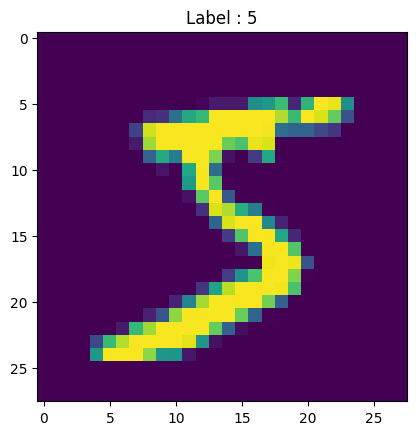

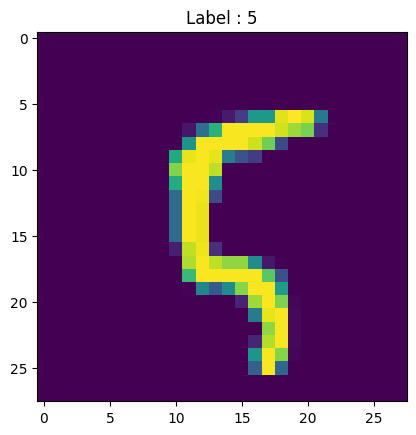

In [3]:
# get basic information about the MNIST dataset after loading it

# shapes and types of the dataset
print('Training images shape : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Test images shape : ', x_test.shape)
print('Test labels shape : ', y_test.shape)

# check unique labels (digits)
print('Unique digit labels : ', set(y_train))

# display a sample digit image
plt.imshow(x_train[0])
plt.title('Label : '+ str(y_train[0]))
plt.show()

# display a sample digit image
plt.imshow(x_train[100])
plt.title('Label : '+ str(y_train[100]))
plt.show()

## 🧮 Step 1 – Load and Preprocess the Image Dataset Handwritten Signature Verification
### 🏦 About Dataset

The Handwritten Signatures Dataset is a curated collection of signature images intended for training and evaluating signature verification systems. In domains like banking, legal services, and identity verification, automated signature authentication is crucial for detecting fraud and ensuring document authenticity.

This dataset provides both genuine and forged signatures for multiple individuals, enabling the development of robust machine learning models for distinguishing real signatures from imitations.

The dataset contains over 5,000 images of signatures from 55 individuals, with a mix of real and fake samples.

📌 Attributes:

- signature image: A binary or grayscale image of varying size containing a person's handwritten signature.
- label: Indicates whether the signature is genuine or forged.
    1 = Genuine
    0 = Forged
- filename: Encodes information such as the user ID, type of signature, and sample number.

🗂 Use Cases:
- Writer identification
- Signature verification (online/offline systems)
- Document authentication
- Fraud detection in finance and legal industries

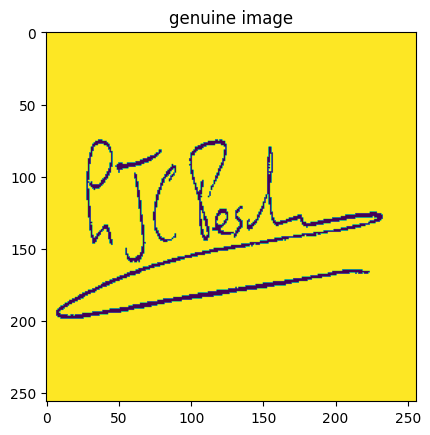

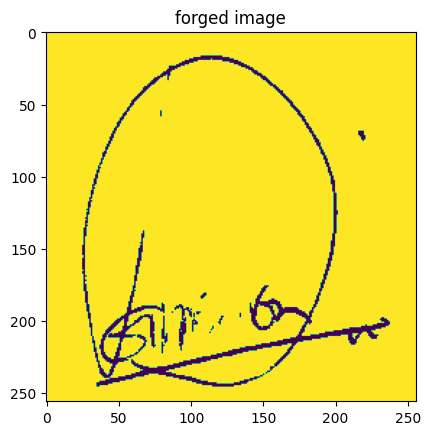

In [4]:
from tensorflow import keras
import matplotlib.pyplot as plt

# Path to one images (choose any from dataset)
genuine_image_path = 'datasets/signature/person1/NFI-00101001.png'
forged_image_path = 'datasets/signature/person2/NFI-00201002.png'

# Load image as grayscale
genuine_image = keras.utils.load_img(genuine_image_path, color_mode='grayscale', target_size=(256, 256))
forged_image = keras.utils.load_img(forged_image_path, color_mode='grayscale', target_size=(256, 256))

# Plot both images
plt.imshow(genuine_image)
plt.title('genuine image')
plt.show()

plt.imshow(forged_image)
plt.title('forged image')
plt.show()

## 🧮 Step 2 – Data Statistics and Visualization

In [ ]:
# get basic information about the MNIST dataset after loading it

# shapes and types of the dataset
print('Training images shape : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Test images shape : ', x_test.shape)
print('Test labels shape : ', y_test.shape)

# check unique labels (digits)
print('Unique digit labels : ', set(y_train))

# display a sample digit image
plt.imshow(x_train[0])
plt.title('Label : '+ str(y_train[0]))
plt.show()

# display a sample digit image
plt.imshow(x_train[100])
plt.title('Label : '+ str(y_train[0]))
plt.show()